# Часть 1. Проверка гипотез и A/B-тесты

# Пример 1

У нас есть информация о времени, которое пользователи проводят на сайте.

### Цель: проверить гипотезу о том, что среднее время, проведенное на сайте, не отличается в двух выборках.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from numpy.random import binomial
from numpy.random import normal
import pandas as pd
from sklearn.model_selection import train_test_split

Загрузим таблицу daily_data.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/daily_data.csv")
df.head()

,Timestamp,Daily Time Spent on Site
0,2016-01-01 21:58:55,5.628218
1,2016-06-17 09:58:46,4.713897
2,2016-07-06 23:09:07,6.716979
3,2016-03-23 08:52:31,5.104541
4,2016-03-18 16:04:59,3.215212


Отсортируем данные по времени и разобъем на две равные части - part1 и part2.

In [ ]:
df.sort_values(by="Timestamp", inplace=True)

df.shape

(40, 2)

In [ ]:
part1 = df.iloc[:20]
part2 = df.iloc[20:]

part1.shape, part2.shape

((20, 2), (20, 2))

Создадим два массива - sample1 и sample2, содержащие значения из столбца Daily Time Spent on Site для part1 и part2 соответственно.

In [ ]:
sample1 = part1['Daily Time Spent on Site']
sample2 = part2['Daily Time Spent on Site']

Построим гистограммы для sample1 и sample2 и убедимся, что распределение данных похоже на нормальное.

<Axes: >

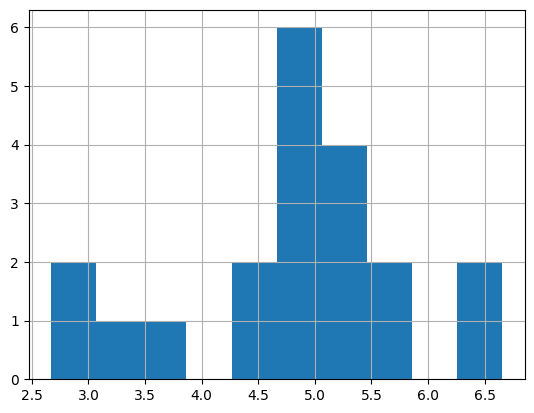

In [ ]:
sample1.hist()

<Axes: >

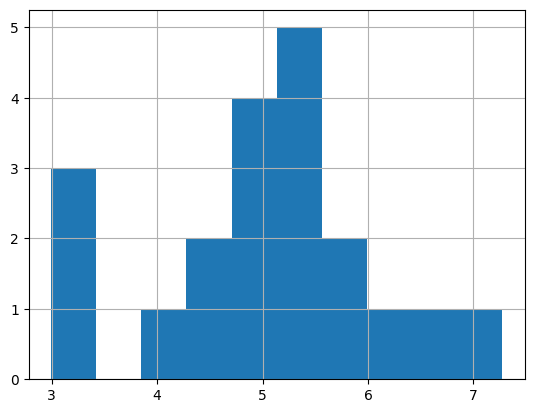

In [ ]:
sample2.hist()

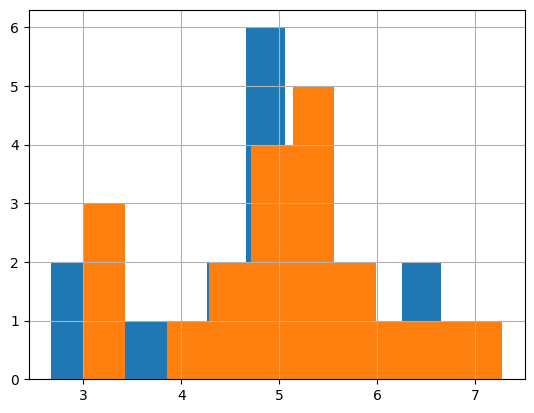

In [ ]:
sample1.hist()
sample2.hist()
plt.show()

Вычислим выборочное среднее для каждого сэмпла (mean1, mean2).

In [ ]:
mean1 = sample1.mean()
mean2 = sample2.mean()

mean1, mean2

(4.798626012383936, 5.017120588495173)

***Нулевая гипотеза: среднее время, проведенное на сайте, в двух выборках не отличается.***

Так как данные имеют нормальное распределение, и число наблюдений мало, будем использовать тест Стьюдента для проверки гипотезы о равенстве средних.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Выполняем тест стьюдента
t_statistic, p_value = ttest_ind(sample1, sample2)

# Выводим результаты
print("Значение t-статистики:", t_statistic)
print("p-значение:", p_value)

if p_value < 0.05:
    print("Различие между выборками статистически значимо")
else:
    print("Различие между выборками не является статистически значимым")

Значение t-статистики: -0.634705182028228
p-значение: 0.529423865953951
Различие между выборками не является статистически значимым


## Пример 2

У нас есть два набора данных, распределенных по биномиальному закону. Будем считать, что это информация о кликах пользователей по рекламным баннерам:

* в первом случае 100 пользователей, из них вероятность клика по баннеру 0.1
* во второй группе также 100 пользователей - и вероятность клика 0.11

Сгенерируем две выборки с заданными параметрами и проверим гипотезу о том, что вероятности кликов одинаковы.

In [ ]:
P1 = 0.1
P2 = 0.11
N1 = 100000
N2 = 100000

In [ ]:
sample1 = binomial(1, P1, N1)
sample2 = binomial(1, P2, N2)

In [ ]:
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

diff = mean1 - mean2
print('mean1: %s' % mean1)
print('mean2: %s' % mean2)
print('mean1 - mean2: %s' % diff)

mean1: 0.09979
mean2: 0.11014
mean1 - mean2: -0.010349999999999998


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Выполняем z-тест для разности двух долей
count = np.array([sample1.sum(), sample2.sum()])  # Количество успехов в каждой выборке
nobs = np.array([N1, N2])  # Общее количество наблюдений в каждой выборке
z_stat, p_value = proportions_ztest(count, nobs)

# Выводим результаты
print("Значение z-статистики:", z_stat)
print("p-значение:", p_value)

if p_value < 0.05:
    print("Различие между долями статистически значимо")
else:
    print("Различие между долями не является статистически значимым")

Значение z-статистики: -7.550628232943828
p-значение: 4.3316366855841175e-14
Различие между долями статистически значимо


Проверим себя

https://abtestguide.com/calc/

# Часть 2. Кластеризация

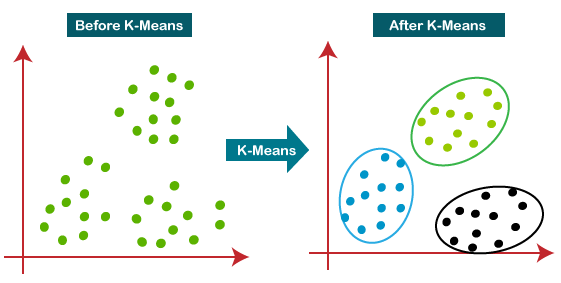

## Алгоритм K-Means

0) Выбираем k - число кластеров. Случайным образом инициализируем начальные центры кластеров

1) Каждую точку относим к кластеру, к центру которого она ближе

2) Пересчитываем центры кластеров, исходя из полученных на шаге 1 кластеров

Повторяем пункты 1-2 до стабилизации кластеров.

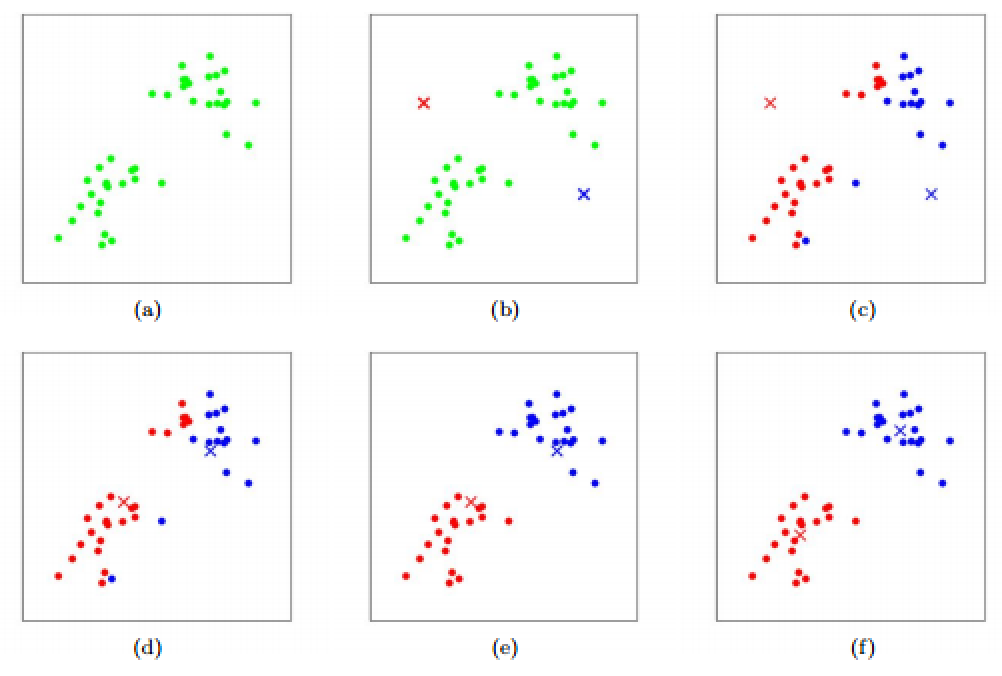

## K-Means Demo

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

# Кластеризация клиентов

Попробуем при помощи K-Means выделить кластеры лояльных и не лояльных клиентов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CustomerChurn.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3602,3038-PQIUY,Female,0,No,No,38,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No
6595,5702-KVQRD,Male,0,Yes,No,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,82.55,5832.65,No
3836,6872-HXFNF,Female,0,Yes,No,64,Yes,Yes,DSL,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),58.35,3756.45,No
146,6837-BJYDQ,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.60,61.35,No
4388,3525-DVKFN,Female,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.40,358.05,No


Проведем первичные преобразования колонок на основе предыдущих исследований:

1) Выделим в отдельную переменную Check факт оплаты электронным чеком

2) Обработаем столбец TotalCharges, чтобы привести его к числовому типу

3) Переведем признак Contract в числовой

4) Переведем некоторые бинарные столбцы в числовые

In [ ]:
df['Check'] = df['PaymentMethod'].apply(lambda x: 1 if x == 'Electronic check' else 0)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: '0' if x == ' ' else x)
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.drop('MonthlyCharges', axis=1, inplace=True)

In [ ]:
df['Contract'] = df['Contract'].map({'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3})

In [ ]:
df['Dependents'] = df['Dependents'].map({'Yes' : 1, 'No' : 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [ ]:
!pip install phik -q

interval columns not set, guessing: ['SeniorCitizen', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'TotalCharges', 'Churn', 'Check']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customerID is large: 7043. Are you sure this is not an interval variable? Analysis for pairs of variables including customerID can be slow.
  warnings.warn(


<Axes: >

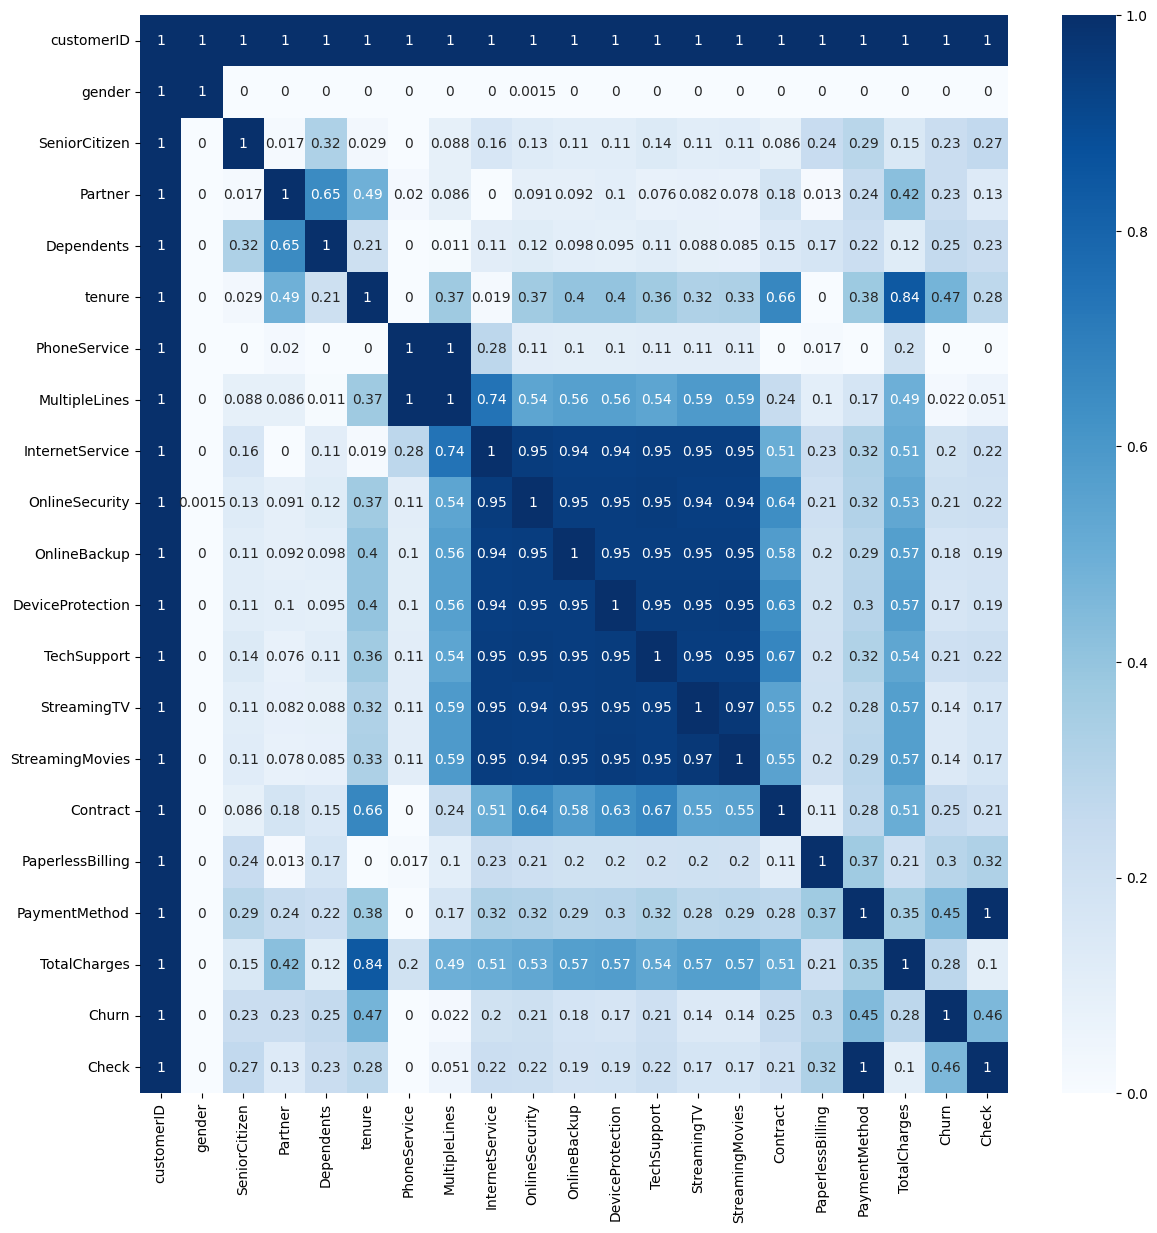

In [ ]:
import phik

plt.figure(figsize=(14,14))

ph = df.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

Оставим несколько относительно сильно коррелирующих с таргетом колонок (набор колонок экспериментальный):

* SeniorCitizen

* Dependents

* tenure

* Contract

* PaperlessBilling

* TotalCharges

* Check

In [ ]:
X_numeric = df.select_dtypes(include='number').drop('Churn', axis=1)
y = df['Churn']

X_numeric.head()

,SeniorCitizen,Dependents,tenure,Contract,PaperlessBilling,TotalCharges,Check
0,0,0,1,1,1,29.85,1
1,0,0,34,2,0,1889.50,0
2,0,0,2,1,1,108.15,0
3,0,0,45,2,0,1840.75,0
4,0,0,2,1,1,151.65,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_numeric = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

X_numeric.head()

,SeniorCitizen,Dependents,tenure,Contract,PaperlessBilling,TotalCharges,Check
0,0.0,0.0,0.013889,0.0,1.0,0.003437,1.0
1,0.0,0.0,0.472222,0.5,0.0,0.217564,0.0
2,0.0,0.0,0.027778,0.0,1.0,0.012453,0.0
3,0.0,0.0,0.625000,0.5,0.0,0.211951,0.0
4,0.0,0.0,0.027778,0.0,1.0,0.017462,1.0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=3)
kmeans.fit(X_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=3)

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

### Проинтерпретируем результат

In [ ]:
np.corrcoef(kmeans.labels_, y)[0][1]

0.39139394916825554

* Кластеры не совпают с фактом оттока / не оттока, но есть большая корреляция

* Можно считать, что один кластер - это более лояльные клиенты, другой - менее лояльные

In [ ]:
for c in X_numeric.columns:
    print(c)
    print(np.corrcoef(X_numeric[c], kmeans.labels_)[0][1])
    print()

SeniorCitizen
0.1936244636921144

Dependents
-0.41392026879383487

tenure
-0.6089935832126738

Contract
-0.7858427811637136

PaperlessBilling
0.2998845725972861

TotalCharges
-0.4038564421211695

Check
0.4789331719362111



Text(0, 0.5, 'TotalCharges')

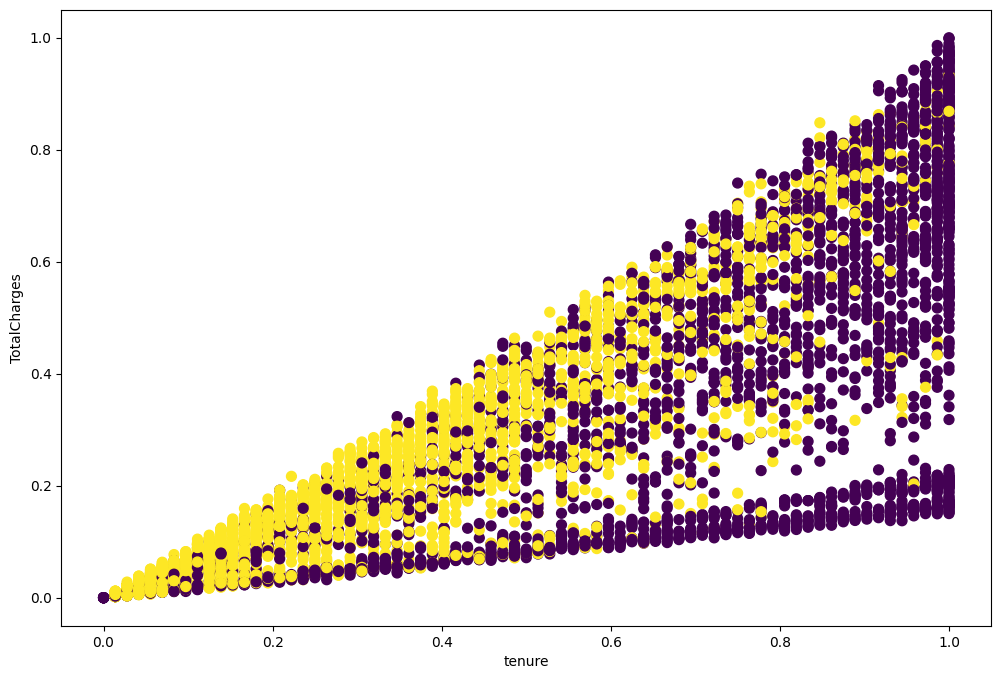

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_numeric['tenure'], X_numeric['TotalCharges'], c = kmeans.labels_, s=50)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')

In [ ]:
df['Churn'].value_counts(), df['Churn'].value_counts(normalize=True)

(Churn
 0    5174
 1    1869
 Name: count, dtype: int64,
 Churn
 0    0.73463
 1    0.26537
 Name: proportion, dtype: float64)

In [ ]:
df[kmeans.labels_ == 0]['Churn'].value_counts(), df[kmeans.labels_ == 0]['Churn'].value_counts(normalize=True)

# лояльные клиенты (не оттоковые)

(Churn
 0    2920
 1     231
 Name: count, dtype: int64,
 Churn
 0    0.92669
 1    0.07331
 Name: proportion, dtype: float64)

In [ ]:
df[kmeans.labels_ == 1]['Churn'].value_counts(), df[kmeans.labels_ == 1]['Churn'].value_counts(normalize=True)

# кластер клиентов, с которым надо работать

(Churn
 0    2254
 1    1638
 Name: count, dtype: int64,
 Churn
 0    0.579137
 1    0.420863
 Name: proportion, dtype: float64)

## Выводы

* Мы разбили клиентов на два кластера при помощи K-Means

* Кластеры отражают лояльность клиентов и сильно коррелируют с фактом оттока

* Можно пробовать работать с каждым кластером в отдельности для удержания клиентов

In [ ]:
df[kmeans.labels_ == 0]['Contract'].value_counts(normalize=True)

Contract
3    0.533481
2    0.351634
1    0.114884
Name: proportion, dtype: float64

In [ ]:
df[kmeans.labels_ == 1]['Contract'].value_counts(normalize=True)

Contract
1    0.902621
2    0.093782
3    0.003597
Name: proportion, dtype: float64

ГИПОТЕЗА

Можно предлагать клиентам из кластера 1 скидки на годовой и двухгодичный контракты.

Гипотезу надо проверять A/B-тестом!